In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score,confusion_matrix

In [34]:
pd.set_option('display.max_columns',40)
forest_data = pd.read_csv('forestfires.csv')
forest_data.head(20)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small


### Data Understanding and preperation

In [15]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [14]:
for col in forest_data.columns:
    print(forest_data[col].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
        ..
86.8     1
94.4     1
18.7     1
88.3     1
86.3     1
Name: FFMC, Length: 106, dtype: int64
99.0     10
129.5     9
142.4     8
231.1     8
108.4     7
         ..
2.4       1
24.9      1
97.9      1
164.1     1
103.8     1
Name: DMC, Length: 215, dtype: int64
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
92.4      1
171.4     1
18.7      1
354.6     1
629.1     1
Name: DC, Length: 219, dtype: int64
9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
2.3      1
14.4     1
7.9      1
16.3     1
7.3      1
Name: ISI, Length: 119, dtype: int64
19.6    8
17.4    8
20.6    7
15.4    7
23.4    6
       ..
16.9    1
32.6    1
24.0    1
25.0

**The month and day feature is repeated so we have to drop unwanted features**

In [37]:
forest_df = forest_data.copy()

In [38]:
forest_df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [41]:
forest_df.drop(labels = ['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis = 1,inplace=True)

In [42]:
forest_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [43]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [47]:
le = LabelEncoder()
forest_df['month'] = le.fit_transform(forest_df['month'])
forest_df['day'] = le.fit_transform(forest_df['day'])
forest_df['size_category'] = le.fit_transform(forest_df['size_category'])
forest_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


### Model building

In [49]:
X = forest_df.iloc[:,:-1]
y = forest_df.iloc[:,-1:]

In [55]:
forest_df.mean()

month              5.758221
day                2.736944
FFMC              90.644681
DMC              110.872340
DC               547.940039
ISI                9.021663
temp              18.889168
RH                44.288201
wind               4.017602
rain               0.021663
area              12.847292
size_category      0.731141
dtype: float64

In [54]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(data = scaled_X,columns=X.columns)
scaled_X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,-1.089076,-0.383187,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [57]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,random_state=12,test_size=0.15,stratify=y,shuffle=True)
X_train.shape,X_test.shape

((439, 11), (78, 11))

### Model training and testing

In [59]:
svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)
y_pred_test = svm_classifier.predict(X_test)
print('Accuracy   : ',accuracy_score(y_test,y_pred_test))
print('Precision  : ',precision_score(y_test,y_pred_test))
print('Recall     : ',recall_score(y_test,y_pred_test))
print('AUC        : ',roc_auc_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

Accuracy   :  0.7564102564102564
Precision  :  0.75
Recall     :  1.0
AUC        :  0.5476190476190477
[[ 2 19]
 [ 0 57]]


**TUNE SVM MODEL USING GridSearchCV**

In [65]:
grid_cv = GridSearchCV(estimator=svm_classifier, param_grid={
    'kernel':['poly','linear','rbf'],
    'degree': range(1,10),
    'C':range(1,10)
})
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 10), 'degree': range(1, 10),
                         'kernel': ['poly', 'linear', 'rbf']})

In [66]:
grid_cv.best_params_

{'C': 8, 'degree': 1, 'kernel': 'linear'}

In [67]:
grid_cv.best_score_

0.9749477533960293

**APPLYING PARAMTERS TO THE MODEL**

Accuracy   :  0.96154
Precision  :  0.98214
Recall     :  0.96491
AUC        :  0.95865


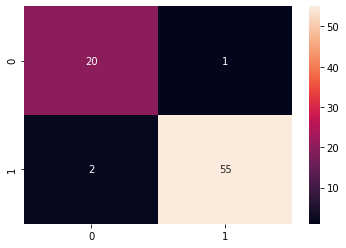

In [75]:
svm_classifier = SVC(C= 8, degree = 1, kernel = 'linear')
svm_classifier.fit(X_train,y_train)
y_pred_test = svm_classifier.predict(X_test)
print('Accuracy   : ',round(accuracy_score(y_test,y_pred_test),5))
print('Precision  : ',round(precision_score(y_test,y_pred_test),5))
print('Recall     : ',round(recall_score(y_test,y_pred_test),5))
print('AUC        : ',round(roc_auc_score(y_test,y_pred_test),5))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf,annot=True)
plt.show()

#### OBSERVATION

In [ ]:
**WE GOT OUR MODEL WITH 96